# Visualize domains

In [1]:
import os
import pandas as pd
import numpy as np

#Developed libraries for working with simulation results
from DS.plots import saturated_steady_state as ssp
from DS.analyses import transient as translys
from DS.data_reader import data_processing as proc

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

## Parent directories

In [2]:
results_dir = r"C:\Users\swkh9804\OneDrive\Documents\Manuscripts\Paper3\Figurecodes"
raw_dir = r"D:\Data\Richards_flow\RF_big_sat_2"

# Visualize velocities and saturation for context

- Units of velocity are m/d
- P is Pressure (kPa)
- Sat is saturation (m3/m3) varying betwen 0.2 and 0.8. So sat = 0.8 means effective saturation = 1, and sat = 0.2 means effective saturation = 0

C:\Users\swkh9804\AppData\Local\Temp\ipykernel_15848\1861561242.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


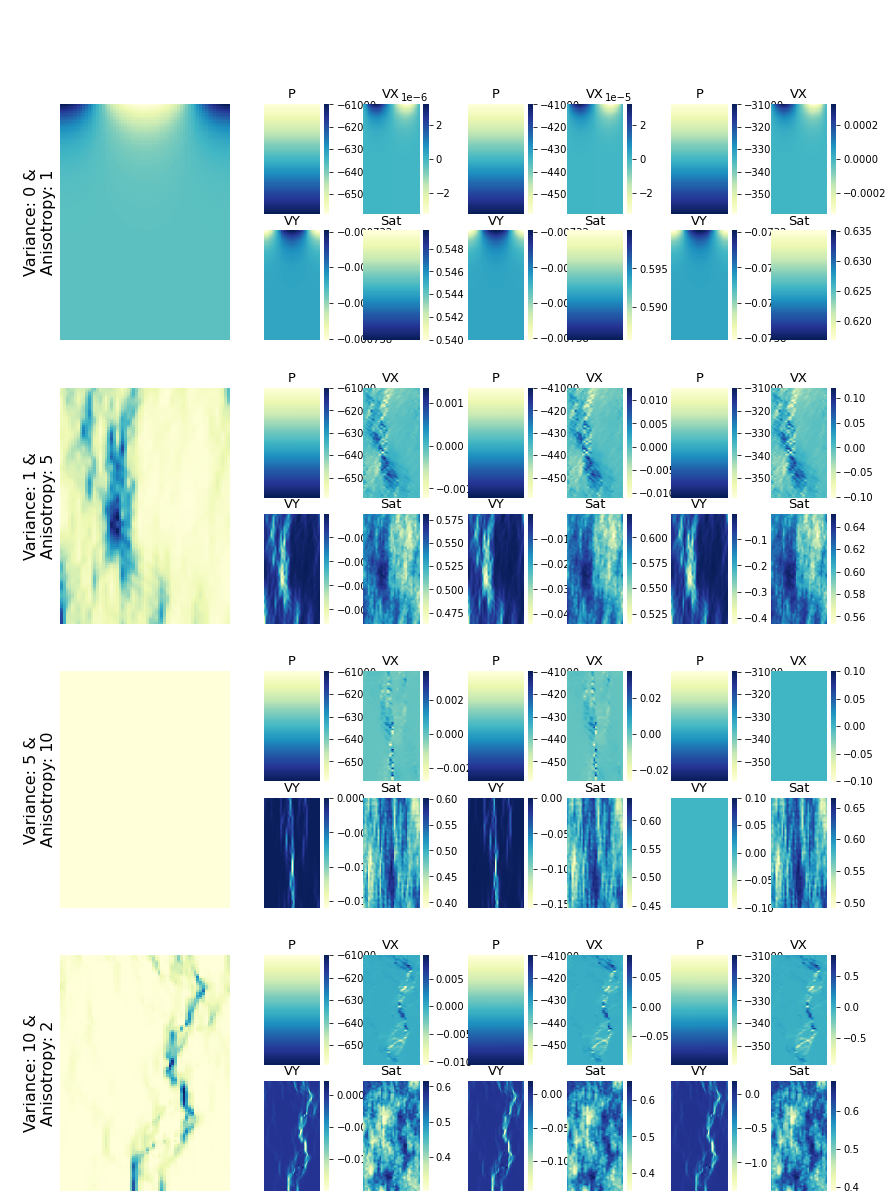

In [3]:
import matplotlib.gridspec as gridspec
Regimes = ["Slow", "Medium", "Fast"]
trialist = proc.masterscenarios("Unsaturated")
Trial = ["H","50", "72", "118"]
species = proc.speciesdict("Unsaturated")
gvarnames = ["P","VX", "VY", "Sat"]
gindx = [0,1,2,4]
velindex = 2
colorscheme = 'YlGnBu'
columntitles = ["Velocity\ndistribution pattern", "Slow\nflow", "Medium\nflow", "Fast\nflow"]
fig = plt.figure(figsize=(14, 20))
outer = gridspec.GridSpec(4, 4, wspace=0.2, hspace=0.2)
pad = 210
for t in Trial:
    file = os.path.join(raw_dir, "FastAR_0_RF-A" + str(t)+ "_df.npy")
    data = np.load(file)
    left = gridspec.GridSpecFromSubplotSpec(1, 1,
                subplot_spec=outer[4*Trial.index(t)], wspace=0.3, hspace=0.1)
    axe = plt.Subplot(fig, left[0])
    velocity = abs(data[velindex, -1, 6:-7, :])
    sns.heatmap(velocity, cmap = colorscheme, ax = axe, cbar = False)
    axe.set_ylabel ("Variance: " + str(trialist[t]["Het"])+ " &\nAnisotropy: " + str(trialist[t]["Anis"]),
                       rotation = "vertical", fontsize = 16, ha = "center")
    axe.set_xticks([])
    axe.set_yticks([])
    fig.add_subplot(axe)    
    for r in Regimes:
        i = Trial.index(t)*len(Regimes) + Regimes.index(r) + Trial.index(t) + 1
        if i%4 != 0:
            inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                                                        subplot_spec=outer[i], wspace=0.4, hspace=0.15)
            file = os.path.join(raw_dir, r + "AR_0_RF-A" + str(t) + "_df.npy")
            data = np.load(file)
            for g in gvarnames:
                axe = plt.Subplot(fig, inner[gvarnames.index(g)])
                sns.heatmap (data[gindx[gvarnames.index(g)], -1, 6:-7, :], cmap = colorscheme, ax= axe)
                axe.set_title(g, fontsize = 13, ha = "center")
                axe.set_xticks([])
                axe.set_yticks([])
                fig.add_subplot(axe)
for a in range(4):
    plt.annotate(columntitles[a], xy=(0.15, 0.92), xytext=(0.0 + pad*a, 10),
                xycoords='figure fraction', textcoords='offset points',
                size='large', ha='center', va='baseline',
                fontsize = 16)
fig.show()

## Saturation and velocity: Takeaways
- The range of saturation is similar between scenarios (except homogeneous case) but the average saturation varies a lot (see attached excel sheet).
- The same is the case with the average velocity in the y direction. (relevant notes in the e-mail).

In [4]:
sns.set(font_scale=2)
Regimes = ["Slow", "Medium", "Fast"]
species = proc.speciesdict("Unsaturated")
Trial = ["H","41", "71", "78"]
iaspecies = list(g for g in species if ((species[g]["State"]=="Active") and (species[g]["Location"] == "Immobile")))
gvarnames = list(g for g in iaspecies if (g != "Immobile active sulphate reducers"))
sptitles = ["Aerobic\ndegraders", "Nitrate\nreducers", "Ammonia\noxidizers"]
velindex = 2
colorscheme = 'YlGnBu'
columntitles = ["Velocity\ndistribution pattern", "Slow flow", "Medium flow", "Fast flow"]
#fig = plt.figure(figsize=(24, 12))
#fig = plt.figure()
#outer = gridspec.GridSpec(4, 4, width_ratios = [0.2,1, 1, 1],wspace=0.15, hspace=0.3)
#pad = 0.28

t = "118"
file = os.path.join(raw_dir, "MediumAR_0_"+"RF-A" + str(t)+"_df.npy")
data = np.load(file)
velocity=abs(data[velindex,-1,6:-6,:])
sat=abs(data[4,-1,6:-6,:])
doc=abs(data[species["DOC"]["TecIndex"],-1,6:-6,:])
dox=abs(data[species["DO"]["TecIndex"],-1,6:-6,:])
nitra = abs(data[species["Nitrate"]["TecIndex"],-1,6:-6,:])
amm = abs(data[species["Ammonium"]["TecIndex"],-1,6:-6,:])
bfo=abs(data[species["Immobile active aerobic degraders"]["TecIndex"],-1,6:-6,:])
bfn=abs(data[species["Immobile active nitrate reducers"]["TecIndex"],-1,6:-6,:])
bfa = abs(data[species["Immobile active ammonia oxidizers"]["TecIndex"],-1,6:-6,:])
#    fig.show()
#picname = "Y:/Home/khurana/4. Publications/Restructuring/Paper1/Figurecodes/FigureB4_immobile_biomass_heatmaps.png"
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)
#picname = "Y:/Home/khurana/4. Publications/Restructuring/Paper1/Figurecodes/FigureB4_immobile_biomass_heatmaps.pdf"
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)



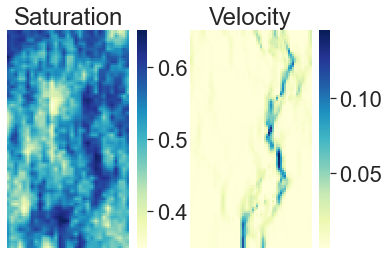

In [5]:
velocity=abs(data[velindex,-1,6:-6,:])
sat=abs(data[4,-1,6:-6,:])
fig, allax = plt.subplots(1,2)
sns.heatmap(velocity,cmap=colorscheme,ax=allax.flat[1])
sns.heatmap(sat,cmap=colorscheme,ax=allax.flat[0])
allax.flat[0].set_title("Saturation")
allax.flat[1].set_title("Velocity")

for axe in allax:
    axe.set_xticks([])
    axe.set_yticks([])

In [13]:
yin = 6
yout = -7
vedge = 0.0025
velem = 0.005
t = "H"
for r in Regimes:
    file = os.path.join(raw_dir, r+"AR_0_"+"RF-A" + str(t)+"_df.npy")
    data = np.load(file)
    sat=((data[4,-1,yin,0]+data[4,-1,yin,-1]+data[4,-1,yout,0]+data[4,-1,yout,-1])*vedge**2 + (np.sum(data[4,-1,yin,1:-1])+np.sum(data[4,-1,yout,1:-1])+ np.sum(data[4,-1,yin+1:yout,0])+np.sum(data[4,-1,yin+1:yout,-1]))*velem*vedge + np.sum(data[4,-1,yin+1:yout,1:-1])*velem**2)/(0.3*0.5)
    print(sat)

0.5447037543615058
0.592653912408828
0.6257123907495072


In [52]:
(1/(0.8-0.2))*0.6257 - 1/3

0.7095

In [45]:
sat1=abs(data[4,0,6:-6,:])
sat2=abs(data[4,-1,6:-6,:])
np.mean((sat1-sat2)/sat1)
## Impose zero flux at inlet
## Impose very high flux at inlet

-2.8571334336021776e-13

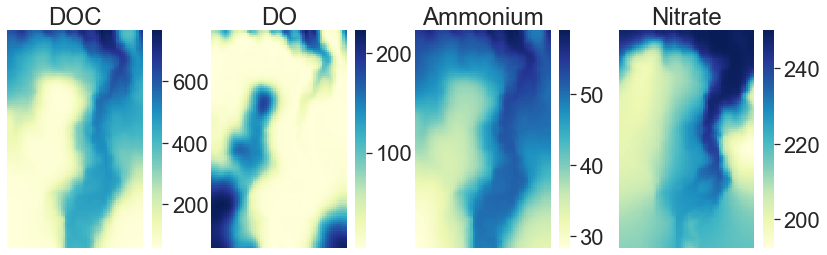

In [46]:
doc=abs(data[species["DOC"]["TecIndex"],-1,6:-6,:])
dox=abs(data[species["DO"]["TecIndex"],-1,6:-6,:])
nitra = abs(data[species["Nitrate"]["TecIndex"],-1,6:-6,:])
amm = abs(data[species["Ammonium"]["TecIndex"],-1,6:-6,:])
fig, allax = plt.subplots(1,4, figsize = (14,4))
sns.heatmap(doc,cmap=colorscheme,ax=allax.flat[0])
sns.heatmap(dox,cmap=colorscheme,ax=allax.flat[1])
sns.heatmap(nitra,cmap=colorscheme,ax=allax.flat[3])
sns.heatmap(amm,cmap=colorscheme,ax=allax.flat[2])

for axe,g in zip(allax, ["DOC", "DO", "Ammonium", "Nitrate"]):
    axe.set_xticks([])
    axe.set_yticks([])
    axe.set_title(species[g]["Graphname"])            

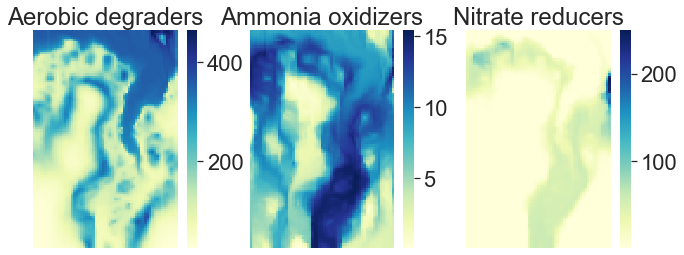

In [47]:
bfo=abs(data[species["Immobile active aerobic degraders"]["TecIndex"],-1,6:-6,:])
bfn=abs(data[species["Immobile active nitrate reducers"]["TecIndex"],-1,6:-6,:])
bfa = abs(data[species["Immobile active ammonia oxidizers"]["TecIndex"],-1,6:-6,:])
fig, allax = plt.subplots(1,3, figsize= (11,4))
sns.heatmap(bfo,cmap=colorscheme,ax=allax.flat[0])
sns.heatmap(bfa,cmap=colorscheme,ax=allax.flat[1])
sns.heatmap(bfn,cmap=colorscheme,ax=allax.flat[2])

#bfo=abs(data[species["Immobile active aerobic degraders"]["TecIndex"],-1,6:-6,:])
#bfn=abs(data[species["Immobile active nitrate reducers"]["TecIndex"],-1,6:-6,:])
#bfa = abs(data[species["Immobile active ammonia oxidizers"]["TecIndex"],-1,6:-6,:])

for axe,g in zip(allax.flat[:], ["Immobile active aerobic degraders","Immobile active ammonia oxidizers","Immobile active nitrate reducers"]):
    axe.set_xticks([])
    axe.set_yticks([])
    axe.set_title(species[g]["Graphname"])

In [ ]:
def conc_time (numpyarray,yin,yout,xleft,xright, nodesinydirection, gvarnames,flowregime, element_length = 0.01, edge_length = 0.005):
    import DS.data_reader.data_processing as proc
    species = proc.speciesdict(flowregime)
    mobilespecies = list(t for t in species.keys() if (species[t]['Location'] == "Mobile") and (species[t]['State'] != "Dissolved"))

    df = numpyarray
    
    conctime = np.zeros([np.shape(df)[1], nodesinydirection, len(gvarnames)])    
    veliredg = df[2, 1:, yin, xright]
    veliledg = df[2, 1:, yin, xleft]
    veloredg = df[2, 1:, yout, xright]
    veloledg = df[2, 1:, yout, xleft]
    veloelem = df[2, 1:, yout, xleft + 1 : xright]
    velielem = df[2, 1:, yin, xleft + 1 : xright]
    velelem = df[2, 1:, yin + 1 : yout, xleft + 1 : xright]
    vellelem = df[2, 1:, yin + 1 : yout, xleft]
    velrelem = df[2, 1:, yin + 1 : yout, xright]
    if flowregime == "Saturated":
        satielem = 1
        satoelem = 1
        satlelem = 1
        satrelem = 1
        satiredg = 1
        satiledg = 1
        satoledg = 1
        satoredg = 1
        satelem = 1
    else:
        def effsat(data):
            slope = 1/(0.8-0.2) #slope = 5/3
            constant = -1/3 # (0-c)/(0.2-0) = slope = 5/3
            sat = slope*data + constant
            return data#sat
        satiredg = effsat(df[4, 1:, yin, xright])
        satiledg = effsat(df[4, 1:, yin, xleft])
        satoredg = effsat(df[4, 1:, yout, xright])
        satoledg = effsat(df[4, 1:, yout, xleft])
        satoelem = effsat(df[4, 1:, yout, xleft + 1 : xright])
        satielem = effsat(df[4, 1:, yin, xleft + 1 : xright])
        satlelem = effsat(df[4, 1:, yin + 1 : yout, xleft])
        satrelem = effsat(df[4, 1:, yin + 1 : yout, xright])
        satelem = effsat(df[4, 1:, yin + 1 : yout, xleft + 1 : xright])
    for i in gvarnames:
        idx = gvarnames.index(i)
        if i == "Nitrogen":
           Nspecies = mobilespecies
           ninlet = 0
           noutlet = 0
           for n in Nspecies:
               ninlet = ninlet + (
                   df[species[n]['TecIndex'], 1:, yin, xleft] * satiledg * veliledg * edge_length
                   + df[species[n]['TecIndex'], 1:, yin, xright] * satiredg * veliredg * edge_length
                   + np.sum(
                       df[species[n]['TecIndex'], 1:, yin, xleft + 1 : xright]
                       * satielem
                       * velielem
                       * element_length,
                       axis=-1,
                   )
               ) / (
                   edge_length * (veliredg + veliledg)
                   + np.sum(element_length * velielem, axis=-1)
               )
               noutlet = noutlet + (
                   df[species[n]['TecIndex'], 1:, yout, xleft] * satoledg * veloledg * edge_length
                   + df[species[n]['TecIndex'], 1:, yout, xright] * satoredg * veloredg * edge_length
                   + np.sum(
                       df[species[n]['TecIndex'], 1:, yout, xleft + 1 : xright]
                       * satoelem
                       * veloelem
                       * element_length,
                       axis=-1,
                   )
                   ) / (
                   edge_length * (veloredg + veloledg)
                   + np.sum(element_length * veloelem, axis=-1)
               )
           sumin = 0
           sumout = 0
           for r in ["Ammonium", "Nitrate"]:
               sumin = sumin + (
                   df[species[r]['TecIndex'], 1:, yin, xleft] * satiledg * veliledg * edge_length
                   + df[species[r]['TecIndex'], 1:, yin, xright] * satiredg * veliredg * edge_length
                   + np.sum(
                       df[species[r]['TecIndex'], 1:, yin, xleft + 1 : xright]
                       * satielem
                       * velielem
                       * element_length,
                       axis=-1,
                   )
               ) / (
                   edge_length * (veliredg + veliledg)
                   + np.sum(element_length * velielem, axis=-1)
               )
               sumout = sumout + (
                   df[species[r]['TecIndex'], 1:, yout, xleft] * satoledg * veloledg * edge_length
                   + df[species[r]['TecIndex'], 1:, yout, xright] * satoredg * veloredg * edge_length
                   + np.sum(
                       df[species[r]['TecIndex'], 1:, yout, xleft + 1 : xright]
                       * satoelem
                       * veloelem
                       * element_length,
                       axis=-1,
                   )
                   ) / (
                   edge_length * (veloredg + veloledg)
                   + np.sum(element_length * veloelem, axis=-1))
            
           conctime[1:, yin, idx] = ninlet / 10 + sumin
           conctime[1:, yout, idx] = noutlet / 10 + sumout  
        elif i == "TOC":
           cinlet = 0
           coutlet = 0
           for c in list(mobilespecies + ["DOC"]):
               cinlet = cinlet + (
                       df[species[c]['TecIndex'], 1:, yin, xleft] * satiledg * veliledg * edge_length
                       + df[species[c]['TecIndex'], 1:, yin, xright] * satiredg * veliredg * edge_length
                       + np.sum(
                        df[species[c]['TecIndex'], 1:, yin, xleft + 1 : xright]
                        * satielem
                        * velielem
                        * element_length,
                        axis=-1)) / (edge_length * (veliredg + veliledg)+ np.sum(element_length * velielem, axis=-1))
               coutlet = coutlet + (
                    df[species[c]['TecIndex'], 1:, yout, xleft] * satoledg * veloledg * edge_length
                    + df[species[c]['TecIndex'], 1:, yout, xright] * satoredg * veloredg * edge_length
                    + np.sum(
                        df[species[c]['TecIndex'], 1:, yout, xleft + 1 : xright]
                        * satoelem
                        * veloelem
                        * element_length,
                        axis=-1,
                    )
                ) / (
                    edge_length * (veloredg + veloledg)
                    + np.sum(element_length * veloelem, axis=-1)
                )
           conctime[1:, yin, idx] = cinlet
           conctime[1:, yout, idx] = coutlet
        else:
           conctime[1:, yin, idx] = (
                    (
                        df[species[i]['TecIndex'], 1:, yin, xleft] * satiledg * veliledg
                        + df[species[i]['TecIndex'], 1:, yin, xright] * satiredg * veliredg
                    )
                    * (edge_length)
                    + (np.sum(df[species[i]['TecIndex'], 1:, yin, xleft + 1 : xright]
                            * satielem
                            * velielem,
                            axis=-1))* element_length) / (edge_length * (veliredg*satiredg + veliledg*satiledg) + element_length*np.sum(velielem*satielem, axis=-1))
           conctime[1:, yout, idx] = (
                    (
                        df[species[i]['TecIndex'], 1:, yout, xleft] * satoledg * veloledg
                        + df[species[i]['TecIndex'], 1:, yout, xright] * satoredg * veloredg
                    )
                    * (edge_length)
                    + (
                        np.sum(
                            df[species[i]['TecIndex'], 1:, yout, xleft + 1 : xright]
                            * satoelem
                            * veloelem,
                            axis=-1,
                        )
                    )
                    * element_length
                ) / (edge_length * (veloredg*satoredg + veloledg*satoledg) + np.sum(element_length * veloelem*satoelem, axis=-1))
           conctime[1:, yin + 1 : yout, idx] = (
                    np.sum(
                        df[species[i]['TecIndex'], 1:, yin + 1 : yout, xleft + 1 : xright]
                        * satelem
                        * element_length
                        * velelem,
                        axis=-1,
                    )
                    + edge_length*(df[species[i]['TecIndex'], 1:, yin + 1 : yout, xleft] * satlelem * vellelem
                        + df[species[i]['TecIndex'], 1:, yin + 1 : yout, xright]*satrelem*velrelem)
                ) / (edge_length * (vellelem*satlelem + velrelem*satrelem) + np.sum(element_length * velelem*satelem, axis=-1))

    TotalFlow = np.sum((veliledg*satiledg + veloledg*satoledg + veliredg*satiredg + veloredg*satoredg) * edge_length + (
        np.sum(vellelem*satlelem)
        + np.sum(velrelem*satrelem)
        + np.sum(velelem*satelem)
        + np.sum(velielem*satielem)
        + np.sum(veloelem*satoelem)
    ) * element_length)
    
    Headinlettime = np.mean(df[2, 1:, yin, :], axis=-1) * -1
    
    return conctime, TotalFlow, Headinlettime